In [2]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

CURDIR = os.path.dirname(os.getcwd())
DATADIR = os.path.join(CURDIR,  "data")
FIGDIR = os.path.join(CURDIR,  "figure")
%matplotlib inline

Using TensorFlow backend.


# Import Dataset

In [3]:
# Import the dataset
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"), delimiter=";")
dataset = df_blockchain['market-price']

# Data scaling
here we scale price between 0 and 1


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))

# Split Data

split data into train/valid/test set as follow :

- test set size : rnn_size + predicition_days(30)
- train set size : 80% of the rest
- valid set size : he rest

In [56]:
# split data
prediction_days = 30
rnn_size = 5

# Your Code Here
test_size = 
train_size = 
valid_size = 


data_train = 
data_valid = 
data_test = 

# Process data
here we process data before training

In [57]:
def process_data(data, rnn_size=rnn_size):
    X = []
    y = []
    for i in range(len(data)-rnn_size):
        X.append(data[i:i+rnn_size])
        y.append(data[i+rnn_size])
    return np.array(X).astype(np.float32).reshape((-1,rnn_size,1)), np.array(y).astype(np.float32)

In [58]:
# process data for RNN
X_train, y_train = process_data(data_train)
X_val, y_val = process_data(data_valid)
X_test, y_test = process_data(data_test)

# Deep Learning Model

here we initialize the model using Keras

In [64]:
# neural network model

# Initialising the model
regressor = Sequential()

# Adding the input/LSTM layer
#Your Code Here

# Adding the output layer
#Your Code Here

#Compiling the neural network with adam optimizer and 'mean_absolute_error' for loss function
#Your Code Here

In [65]:
#Fitting the Recurrent Neural Network
regressor.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 50)

Train on 2507 samples, validate on 623 samples
Epoch 1/50
2507/2507 [==============================] - 1s 384us/step - loss: 0.0962 - val_loss: 0.2483
Epoch 2/50
2507/2507 [==============================] - 1s 241us/step - loss: 0.0491 - val_loss: 0.1217
Epoch 3/50
2507/2507 [==============================] - 1s 235us/step - loss: 0.0323 - val_loss: 0.0667
Epoch 4/50
2507/2507 [==============================] - 0s 196us/step - loss: 0.0336 - val_loss: 0.0157
Epoch 5/50
2507/2507 [==============================] - 1s 203us/step - loss: 0.0226 - val_loss: 0.0102
Epoch 6/50
2507/2507 [==============================] - 1s 209us/step - loss: 0.0163 - val_loss: 0.0101
Epoch 7/50
2507/2507 [==============================] - 1s 202us/step - loss: 0.0163 - val_loss: 0.0270
Epoch 8/50
2507/2507 [==============================] - 0s 195us/step - loss: 0.0231 - val_loss: 0.0329
Epoch 9/50
2507/2507 [==============================] - 0s 184us/step - loss: 0.0219 - val_loss: 0.0307
Epoch 10/50
2507/

# Evaluation

In [66]:
# compute mae score for test set


25/25 [==============================] - 0s 279us/step


0.014129127375781536

In [85]:
# compute preditcion for test set 
y_pred = 

In [81]:
# inverse scaling
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1,1))

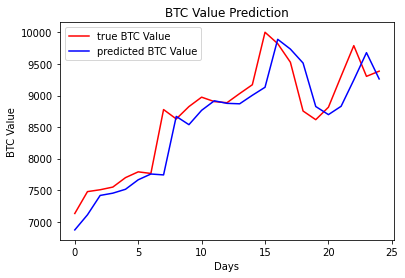

In [84]:
#Graphs for predicted values
plt.plot(y_test_inverse, color = 'red', label = 'true BTC Value')
plt.plot(y_pred_inverse, color = 'blue', label = 'predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()